# Первое задание

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [83]:
x = np.array([19.5, 15, 13.5, 23.3, 6.3, 2.5, 13, 1.8, 6.5, 1.8])
y = np.array([0, 38.5, 59, 97.4, 119.2, 129.5, 198.7, 248.7, 318, 438.5])

In [84]:
np.corrcoef(x, y)

array([[ 1.        , -0.67705142],
       [-0.67705142,  1.        ]])

Коэффициент корреляции равен -0.677051

In [85]:
# тут немного упростил себе жизнь, используя функцию linregress, но во второй задаче делаю всё через формулы
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

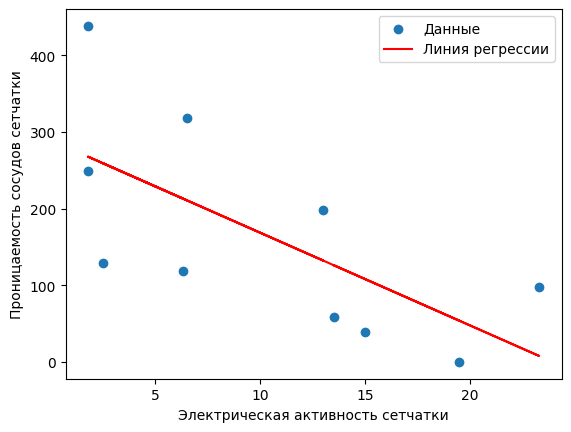

In [86]:
plt.scatter(x, y, label='Данные')
plt.plot(x, line, color='red', label='Линия регрессии')
plt.xlabel('Электрическая активность сетчатки')
plt.ylabel('Проницаемость сосудов сетчатки')
plt.legend()
plt.show()

In [87]:
f'Уравнение регрессии: y = {slope} * x + {intercept}'

'Уравнение регрессии: y = -12.09182361880855 * x + 289.53761974610427'

Коэффициент корреляции равен -0.677051, что говорит о довольно высокой обратной зависимостью между электрической активностью сетчатки и проницаемостью сосудов сетчатки

In [88]:
p_value

0.03151397425563342

Так как prob p-value меньше выбранного уровня значимости (0.05 в нашем случае), то нулевая гипотеза отвергается, принимается гипотеза H1. Она утверждает, что корреляция между переменными значима

# Второе задание

In [89]:
from scipy.stats import t

In [102]:
x = np.array([52, 110, 170, 141, 150, 160, 200, 230, 240, 260, 270, 300])
y = np.array([100, 90, 130, 31, 60, 39, 58, 70, 80, 150, 120, 130])

In [103]:
# вычисление коэффициентов регрессии
n = len(x)
S_x = np.sum(x)
S_y = np.sum(y)
S_xx = np.sum(x ** 2)
S_xy = np.sum(x * y)
x_bar = S_x / n
y_bar = S_y / n

In [104]:
slope = (S_xy - n * x_bar * y_bar) / (S_xx - n * x_bar ** 2)
intercept = y_bar - slope * x_bar

In [105]:
print(f"Наклон (slope): {slope}")
print(f"Пересечение с осью y (intercept): {intercept}")

Наклон (slope): 0.21984171533612995
Пересечение с осью y (intercept): 46.341780323967946


In [108]:
# линия регрессии
line = slope * x + intercept

In [109]:
correlation = np.corrcoef(x, y)[0, 1]
f'Коэффициент корреляции равен {correlation}'

'Коэффициент корреляции равен 0.41636402741536743'

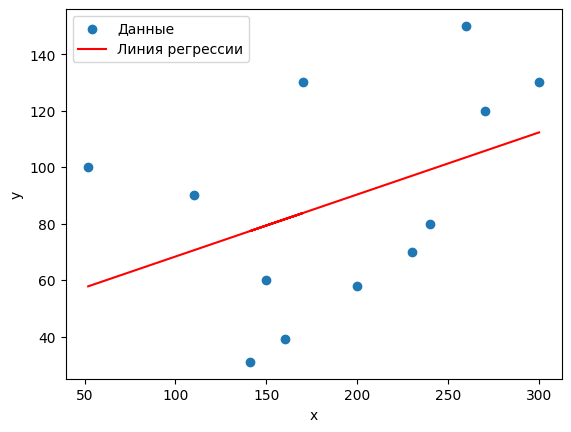

In [111]:
plt.scatter(x, y, label='Данные')
plt.plot(x, line, color='red', label='Линия регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [112]:
f"Уравнение регрессии: y = {intercept:.2f} + {slope:.2f} * x"

'Уравнение регрессии: y = 46.34 + 0.22 * x'

In [113]:
# вычисление t-статистики
t_statistic = correlation * np.sqrt((n - 2) / (1 - correlation ** 2))

In [114]:
# вычисление степеней свободы
df = n - 2

In [115]:
# вычисление p-значения
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))
f'p-value: {p_value}'

'p-value: 0.17819111920353015'

Так как prob p-value больше выбранного уровня значимости (0.05 в нашем случае), то нулевая гипотеза принимается. Она утверждает, что корреляция между переменными не значима